<a href="https://colab.research.google.com/github/nortonvanz/Fundamentals/blob/main/Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Livro Base: Estatística Prática para Cientistas de Dados - Peter Bruce & Andrew Bruce.

Manter atualizado no Github: https://github.com/nortonvanz/Fundamentals/blob/main/Statistic.ipynb

# Ciência de Dados

É transformar grandes quantidades de dados em informação, que ajude a tomar melhores decisões.

Combinação de disciplinas: matemática, estatística, ciência da computação, conhecimento de negócio.

Ex: feed do instagram (sist. recom), resultados do google  (sist. rank)..

## Dados

Dados não estruturados (sem padrão): emails, audios, imagems, vídeos, clisckstreams..

Dados estruturados (estrutura padronizada): de bancos de dados, planilhas, sensores..

Tipos:
- Numéricos: Contínuos (float) ou Discretos (int)
- Categóricos:
  - binários
  - cat nominais (sem ordem)
  - cat ordinais (com ordem): Ano de construção contínuo (ex 1900 a 2014), mas não ordinal. Mas se binarizar em décadas (1900-1910, 1911-1920..), se torna categórica ordinal.

Variáveis preditoras (features) são usadas para prever uma variável dependente (target).

Dados de series temporais registram medições sucessivas da mesma variável.

In [ ]:
#imports
import pandas                      as pd
import numpy                       as np
from scipy.stats                   import stats, poisson, expon, weibull_min, chi2_contingency
from matplotlib                    import pyplot as plt
import seaborn                     as sns
from math                          import factorial

In [ ]:
#Dataset para exemplificar os conceitos:
pd.options.display.float_format = '{:.2f}'.format
url = "https://raw.githubusercontent.com/nortonvanz/House-Rocket-Real-State-EDA/main/src/kc_house_data.csv" #previsão de preço de imóveis em King County #https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv(url, low_memory=False, nrows=100).drop('id', axis=1)
print(df.shape)
df.head()

(100, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# Estatística

A estatística é a ciência que se dedica a coletar, organizar e interpretar dados.

A estatística nos ajuda a entender os dados e tomar decisões com base em dados.


Estatísticos estimam, cientistas de dados medem:
- O estatístico foca na foca na contabilização da incerteza, chama por ex "Estimativas de Localização".
- O DS foca nos objetivos concretos corporativos, já chama de "Métricas de Localização".  

Principais áreas:
 - 1 Estatística descritiva: técnicas para descrever e resumir dados.
 - 2 Estatística inferencial: tirar conclusões sobre grandes populações a partir de uma amostra.

## 1 Estatística Descritiva


É usada na EDA do projeto.

- Análise Univariada: analisa 1 var. Ex: mean, std.
- Análise Bivariada: analisa 2 vars. Ex: correlação, gráfico dispersão.
- Análise Multivariada: analisa 3 ou + vars. Ex:

Analisar dados é:

- Identificar comportamentos médios (o padrão). Ex: Quantas venda, em média, são feitas por mes?
- Identificar comportamentos discrepantes (outliers). Ex: em um mês do ano, as vendas são 2x maiores.
- Fazer comparações. Ex: nos últimos anos, a idade do cliente vem aumentando, em média.

[Datalab.net/statistics](https://datatab.net/statistics-calculator/descriptive-statistics)

### 1.1 - Métricas de Localização (Tendência Central):
Resumem os dados em um único número onde os dados estão localizados.



#### Média


Média: ponto central dos dados. Na estatística, é o "valor esperado", desde que todos os pontos tenham a mesma chance de acontecer.
- Se jogar 1k vezes um dados de 6 lados não viciado, o valor esperado é 3,5 (1+2+3+4+5+6 = 21, logo 21/6).
- Usada para dados mais homogêneos, pois é muito afetada por outliers.
  - Ex: Qual o patrimônio médio dos moradores de Seattle, onde Bill Gates mora, que tem 100B+ em patrimônio? A média aqui não resume bem a realidade, pois os 100 bilhões do Gates vão jogar a média pra cima!

In [ ]:
#Qual o valor esperado para uma casa?
#10 preços:
df.price[:10]

0    221900.00
1    538000.00
2    180000.00
3    604000.00
4    510000.00
5   1225000.00
6    257500.00
7    291850.00
8    229500.00
9    323000.00
Name: price, dtype: float64

In [ ]:
#média:
df.price.mean()
#Algumas casas como a de $1.225.000 puxam a média pra cima. A mediana aqui dá uma ideia melhor de centralidade.

519149.35

#### Mediana

Mediana: ponto central de uma lista ordenada. É o valor que separa a metade maior da metade menor de uma amostra.
- Se número total par, é a média dos 2 números que separam as metades.
- Usada para dados com muita variância, pois não é afetada por outliers (é robusta contra).
  - Outlier: valor muito distante de outros. Devem ser investigados, para determinar se são erros ou se representam fenômenos reais.
- É o 2° quartil, ou 50° percentil.

In [ ]:
#Qual o valor esperado para uma casa?
#mediana:
df.price.median()
#Robusta contra os preços outliers, dá uma boa ideia de um valor esperado de uma casa, sendo robusto contra os outliers.

433750.0

#### Moda

Moda: é o valor que mais se repete.
- Usada para saber o valor numérico ou categórico que mais se repete. Ou valores, em caso de empate.
- Ex: qual o modelo de carro mais comum? Qual a nota do produto mais comum?

In [ ]:
#A maioria das casas tem quantos quartos?
df.bedrooms.mode()

0    3
Name: bedrooms, dtype: int64

#### Valor Esperado

Valor Esperado (esperança matemática): média ponderada, onde os pessos são probabilidades.
- Cálculo: 1) multiplique os resultados pelas probabilidade de ocorrer. 2) some os valores.
- Ex: Um serviço de nuvem é ofertad com pacote de 50/mês e de 300/mês. Em webinars gratuítos, em média, 15% assinam o de 50, e 5% o de 300. Qual é o valor esperado de um participante do webinar?

In [ ]:
# Valor Esperado:
ve = (0.05 * 300) + (0.15 * 50)
print(f'O valor esperado de um participante do webinar é R${ve}')

O valor esperado de um participante do webinar é R$22.5


### 1.2 - Medidas de Variabilidade (Dispersão)

Resumem os dados em um único número, que informa o quão espalhados estão, em torno de uma
medida de tendência central (var e std em torno da média).

A principal é o std. Var e std são sensíveis aos outliers (pois são baseados em desvios quadráticos). Percentis são robustos.


#### Variância

Variância: Indica a dispersão dos dados em torno da média. [menos usada pq muda a escala]
 - Se os valores estiverem muito espalhados, a variância será grande.
 - Ela muda a escala dos dados (eleva ao quadrado, pra não subtrair os negativos). Então se é idade, vira idade ao quadrado.

In [ ]:
#preços das casas
df.price[:10]

0    221900.00
1    538000.00
2    180000.00
3    604000.00
4    510000.00
5   1225000.00
6    257500.00
7    291850.00
8    229500.00
9    323000.00
Name: price, dtype: float64

In [ ]:
#Variância:
df.price.var()
#a var não diz muito, pois está sempre ao quadrado, então estamos vendo em preço ao quadrado

92721280476.59337

Parênteses:

Coeficiente de Variação: usado para comparar a variabilidade de duas ou mais vars com escalas ou unidades de medida diferentes.
                             
  - Ex: escolher 1 ação entre a X e a Y, considerando o nível de volatilidade de seus retornos.
    - X, tem média de retorno de 8% a.a, e std de 3%.  CV=37%
    - Y, tem média de retorno de 10% a.a e std de 12%. CV=120%
    - Usando o CV, posso comparar a dispersão relativa dos retornos em relação às médias. Conclui-se que Y, é muito mais volátil, logo mais arriscado que X.

- Cálculo: o quanto o std representa da média. Cálculo: (std / media) * 100.

#### Desvio Padrão

Desvio Padrão: Distância média dos meus pontos em relação à média (centro). É a raiz quadrada da variância.
- Serve para entender em uma métrica, em média, quão espalhados os dados estão com relação a média.
- Caso dados contenham outliers, ele será distorcido da mesma forma que a média.
- Não pode ser usado para comparar vars com escalas ou unidades de medida diferentes. Usa o Coef Variação.

In [ ]:
#Desvio padrão
df.price.std()
#Na média, uma casa está $ 304k distante da média, indicando uma alta variabilidade nos dados, ou seja, temos valores bem distintos.

304501.6920750907

Além do std, pode-se estimar a dispersão dos dados olhando sua distribuição:
- Quartil e Percentis:

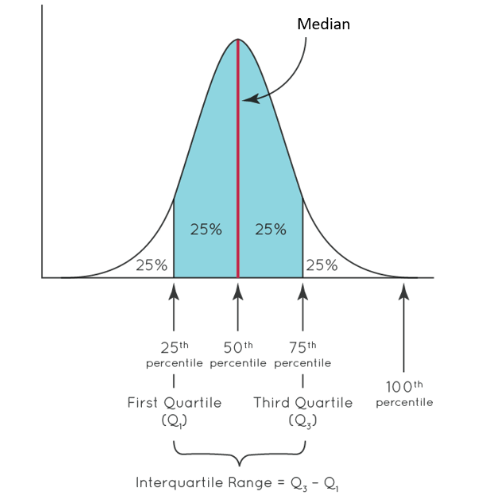

#### Quartis

Quartis:
- 3 Quartis:
 - Q1 (1º quartil) - É um **valor** calculado, em que 25% dos dados são menores e 75% dos dados são maiores.
 - Q2 (mediana) - Ou .5 quantil, ou 50º percentil.
  - Os quantis variam de 0 a 1, mas quando estamos lidando com dados reais (plot de gráficos QQ mais adiante), é possível ver escalas de -3 a 3, por exemplo.
 - Q3 (3º quartil).
- Caso eu binarize a feature, vou precisar da parte dos dados acima do 3º quartil, então faz sentido aqui criar um "Q4", que nesse contexto iria de 75 a 100º percentil.

Percentil:
- 100 percentis. 50º: [quantil .5] = [mediana (meio exato da distribuição)]

#### IQR

IQR:
- interquartile range, dif entre o 25º e o 75º percentil.
- Quanto maior, maior a variação dos dados.
- Útil pra identificar outliers: Valores abaixo de Q1 - (1.5 x IQR) ou acima de Q3 + (1.5 x IQR) são frequentemente considerados outliers. É assim que o boxplot considera.

In [ ]:
#IQR:
stats.iqr(df.price) #scipy function
#Entre o percentil 25 e o 75, temos $ 345k. Em uma distr. normal, 2/3 dos dados estariam nesta faixa.

345125.0

In [ ]:
#Qual é o preço que representa Q1 (25º percentil)?
df.price.quantile(.25)
#O preço de $208k separa os 25% menores preços dos 75% maiores.

308000.0

In [ ]:
# A função describe() do pandas já traz medidas de tendência central (média e mediana) e de dispersão (std, min, max, percentis):
df.price.describe(percentiles=[.1, .25, .75]) #default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.
#Nos 10% preços mais baixos, temos casas até $22k.

count       100.00
mean     519149.35
std      304501.69
min      153000.00
10%      229950.00
25%      308000.00
50%      433750.00
75%      653125.00
max     2000000.00
Name: price, dtype: float64

### Plots - Univariada

Análise Univariada: analisa 1 variável.

#### Histogram

Histograma: é uma tabela de frequências com em bins iguais.
- Usada para dados numéricos.
- Bins da var no eixo x, contagem no y.
- Essa binarização pode ajudar a descobrir relação entre features.

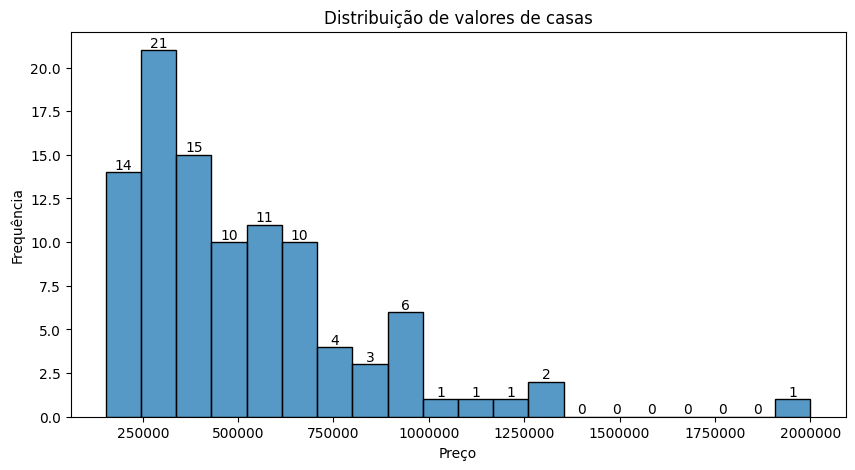

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df['price'], bins=20, kde=False)
plt.title('Distribuição de valores de casas')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.ticklabel_format(style='plain', axis='x')
# Adicionando legendas no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### Skew

Assimetria (skew): indica se var está concentrada em valores maiores ou menores.
- Skew positiva: se desloc p/ esqueda: concentração dos valores é baixa.
- Skew negativa: se desloc p/ direita (pico na direita): concentração dos valores é alta.
- Uma distr. normal não tem skew: média = mediana.

In [ ]:
#Skew de price:
df.price.skew()

1.8255346212208772

#### KDE (Gráf Densidade)

Versão simplificada de um histograma.
 Var no eixo x, densidade da probabilidade no eixo y.
 - Densidade de probabilidade: é uma medida da probabilidade de que a variável aleatória tenha um valor próximo a um ponto específico. Quanto maior a densidade em um ponto, maior a probabilidade de encontrar observações próximas a esse valor.

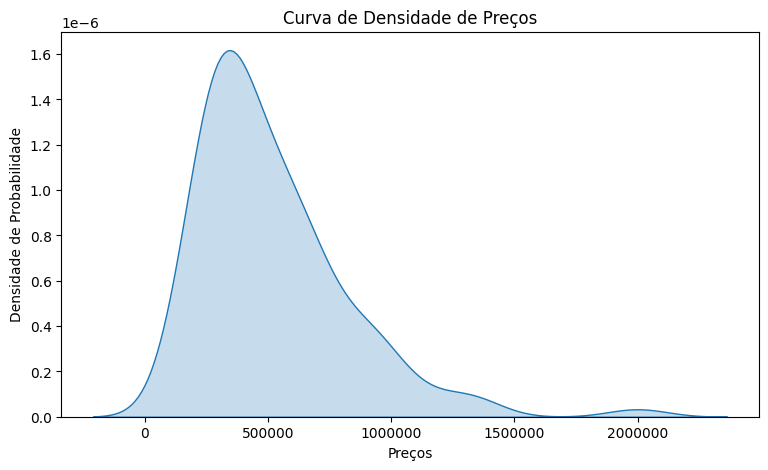

In [ ]:
# Plotar a assimetria da variável 'price'
plt.figure(figsize=(9, 5))
sns.kdeplot(df['price'], fill=True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Curva de Densidade de Preços')
plt.xlabel('Preços')
plt.ylabel('Densidade de Probabilidade')
plt.show()
#1 × 10^(-6) = 1 ÷ 10^6 = 1 ÷ 1,000,000 = 0.000001

Interpretação:
- Curva deslocada para esquerda, logo concentração dos valores é baixa. Skew é positiva.
- A densidade de probabilidades é mais alta em torno de $400k, logo é maior a probabilidade de encontrarmos preços próximos a esse valor.  

#### Kurtosis

Kurtose: propensão dos dados terem valores extremos (achatamento da curva)
- Positiva: pico extremo, cauda longa
- Negativa: pico baixo, cauda curta
- Próx a zero: distribuição noramal

In [ ]:
#Kurtosis de price:
df.price.kurt()

5.118092315921146

O gráfico de densidade mais acima já mostra a kurtose, que é alta, indicando a existência de valores extremos.

Para plotar tanto a distribuição como a densidade, usar kde=True no histplot:

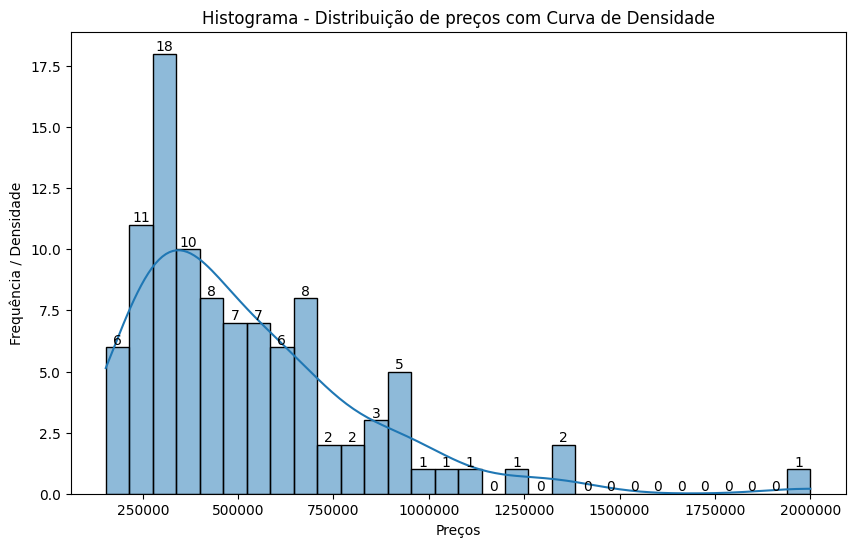

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histograma - Distribuição de preços com Curva de Densidade')
plt.xlabel('Preços')
plt.ylabel('Frequência / Densidade')
plt.ticklabel_format(style='plain', axis='x')
# Adicionando legendas no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

É possível ver acima a distribuição de frequencias, a skew e a curtose da variável 'price'.

#### Resumo Estatística Descritiva

##### Numerical Attributes

In [ ]:
num_attributes = df.select_dtypes(include=['int64', 'float64'])
num_attributes.sample(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
75,832500.00,4,4.00,3430,35102,2.00,0,0,4,10,2390,1040,1986,0,98075,47.58,-121.99,3240,35020
91,1099880.00,5,2.75,3520,6353,2.00,0,0,4,10,3520,0,2001,0,98199,47.65,-122.39,2520,6250


In [ ]:
#Central tendency metrics: mean and median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
#Dispersion metrics: standard deviation, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T
#Concatenate
num_metrics = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
num_metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [ ]:
num_metrics

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,153000.00,2000000.00,1847000.00,519149.35,433750.00,302975.36,1.83,5.12
1,bedrooms,2.00,5.00,3.00,3.40,3.00,0.79,0.40,-0.21
2,bathrooms,1.00,4.50,3.50,2.00,2.00,0.72,0.41,0.41
3,sqft_living,770.00,5420.00,4650.00,2088.72,1930.00,856.22,1.11,1.80
4,sqft_lot,1044.00,101930.00,100886.00,11732.50,6769.50,14725.89,3.53,15.36
5,floors,1.00,3.00,2.00,1.47,1.50,0.51,0.58,-0.54
6,waterfront,0.00,1.00,1.00,0.01,0.00,0.10,10.00,100.00
7,view,0.00,4.00,4.00,0.18,0.00,0.74,4.21,17.06
8,condition,1.00,5.00,4.00,3.43,3.00,0.72,0.57,0.90
9,grade,5.00,11.00,6.00,7.61,7.00,1.04,1.01,1.61


##### Cathegorical Attributes

In [ ]:
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])
cat_attributes.sample(2)

,date
28,20140624T000000
26,20140626T000000


In [ ]:
#variations of each cat column
pd.set_option('max_colwidth', 150)
print(f"- Distinct values:\n{cat_attributes.apply( lambda x: x.unique().shape[0] ) } \n" )
print(f"- Variations:\n{cat_attributes.apply( lambda x: x.unique() ) } " )

- Distinct values:
date    86
dtype: int64 

- Variations:
               date
0   20141013T000000
1   20141209T000000
2   20150225T000000
3   20150218T000000
4   20140512T000000
..              ...
81  20140725T000000
82  20141223T000000
83  20140908T000000
84  20150330T000000
85  20140711T000000

[86 rows x 1 columns] 


Aqui não foi muito útil, mas tendo mais vars, é interessante ver as principais variações, para ter ideias das categorias existentes.

### Plots - Bi e Multivariada



- Análise Bivariada: analisa 2 vars. Ex: correlação, gráfico dispersão.
- Análise Multivariada: analisa 3 ou + vars. Ex:

#### Correlation

Correlação: entre vars preditoras, e entre preditoras e var alvo:
- Vars X e Y são correlacionadas, se valores altos de X acompanharem valores altos de Y.
- Idem pra baixos. Se valores altos de x acompanharem valores baixo de Y, são negativamente correlacionadas.  

Legendas das correlações abaixo:
- num x num: entre 2 feat. numéricas.
- cat x cat: entre 2 feat. categóricas.
- cat x num: entre 1 numérica e 1 categórica.


##### Pearson (num x num)

Coeficiente de corr de Pearson: mede a força e a direção da relação linear entre duas vars numéricas.
- Interpretação: 1=corr perfeita. -1=corr negativa perfeita. 0=ausência de corr.
- Premissas:
 - Variáveis contínuas: não é apropriado para vars categóricas ou ordinais. Sendo contínuas, as variávies podem estar em escalas diferentes.
 - Linearidade: vars tem relação linear, ou seja, ao plotar um scatterplot, pontos devem formar um padrão que possa ser aproximado por uma reta. (ver via scatterplot)
 - Ausência de outliers influentes: podem influenciar no cálculo. (ver também via scatterplot)
 - Normalidade: variávies devem seguir uma distr. normal. Isso é mais importante para a significância estatística, e menos para a interpretação do valor do coeficiente. (ver via scipy.stats.shapiro ou scipy.stats.kstest)
 - Homocedasticidade: o espalhamento dos pontos ao longo da linha de regressão deve ser homogêneo. (ver via gráfico de resíduos)
 - Independência dos dados: os dados de X e Y devem ser independentes. (ver via conhec. negócio)




In [ ]:
# Existe correlação entre o ano de construção e o tamanho do metro quadrado construído?
# Cálculo do coeficiente de correlação de Pearson
df['yr_built'].corr(df['sqft_lot'])

0.12409744324352504

O resultado indica que há bem pouca correlação entre o ano de construção e o tamanho do metro quadrado construído.

OBS: não validei se todas as premissas foram atendidas. Ainda que na prática, violaremos algumas vezes.

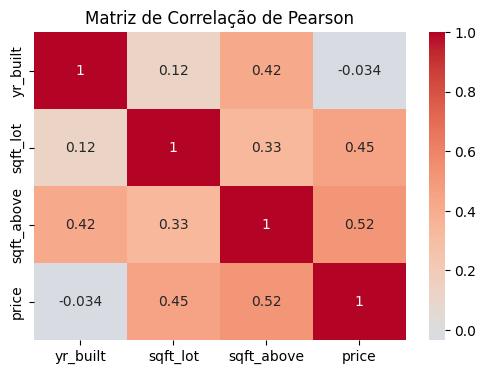

In [ ]:
# Cálculo da matriz de correlação
matriz_correlacao = df[['yr_built','sqft_lot','sqft_above','price']].corr()

# Plotando a matriz de correlação com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação de Pearson')
plt.show()

O resultado indica que há uma correlação média entre o preço e a metragem do porão.
OBS: não validei se todas as premissas foram atendidas.

##### Spearman (cat ord x (num || cat ord) )
(cat ord x num ) ou (cat ord x cat ord)

Coeficiente de correlação de Spearman (ρ (rho)): mostra a associação entre vars por meio de uma função não linear.
- Interpretação: 1=corr perfeita. -1=corr negativa perfeita. 0=ausência de corr.
- É adequado para avaliar a correlação entre:
 - Dupla Ordinal: duas vars categóricas ordinais.
 - Categórica orginal vs numérica.
- Mede a relação monotônica entre duas variávis: se aumentando x, aumenta y, ou se aumentando x, diminui y, ou se são independentes (sem relação nonotônica.).

Premissas:
- vars devem ser: Dupla ordinal, ou ordinal + numérica.
 - poderia converter uma var contínua em ordinal cat, binarizando (ex: idades contínuas em bins de 1 a 5), mas pode haver perda de informação pela perda de variabilidade.
- não requer que a relação entre as vars seja linear
- indiferente a outliers


No contexto deste dataset, pode ser usada para avaliar Price (contínua) vs Condicion (cat ordinal, que varia de 1 a 5):

In [ ]:
df.condition.value_counts()

,count
condition,
3,62
4,26
5,10
1,1
2,1


In [ ]:
#Existe correlação entre o preço e a condição avaliada da casa?
df['price'].corr(df['condition'], method='spearman')

-0.00011137173377838369

O resultado indica que não há correlação entre o preço e a condição avaliada da casa.

In [ ]:
#e com grade, que também é categórica?
df.grade.value_counts()

,count
grade,
7,50
8,28
9,10
6,5
10,4
11,2
5,1


In [ ]:
#Existe correlação entre o preço e a nota avaliada da casa?
df['price'].corr(df['grade'], method='spearman')

0.6787930814657495

O resultado indica que há uma correlação moderada/forte entre o preço e a nota avaliada da casa!

##### Coeficiente de Cramér V (cat x (cat || num binarizada )

Usado para medir a associação entre variáveis categóricas (nominais ou ordinais, indiferente).
- Ele varia de 0 a 1, onde 0 = ausência de associação entre as vars, e 1 = associação perfeita.
- Pode ser usado entre cat e num, após categorizar a var numérica.
Premissas:
 - Variáveis categóricas (nominais ou ordinais, indiferente)
 - Independência: entre as vars.
 - Tamanho da amostra: resultados mais confiáveis são obtidos com tamanhos de amostras maiores.
 - Distribuição de frequências: as frequências esperadas em cada célula da tabela de contingência devem ser suficientemente grandes (geralmente, cada célula deve ter uma frequência esperada de pelo menos 5).

Ex: Qual é a correlação entre Grade e Condition (cat x cat)?

In [ ]:
df[['grade','condition']][:3]

,grade,condition
0,7,3
1,7,3
2,6,3


In [ ]:
# Criando a tabela de contingência
contingency_table = pd.crosstab(df['condition'], df['grade'])

# Calculando a estatística do qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cramér V
n = contingency_table.sum().sum()  # Total de observações
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Exibindo o resultado
print(f"Coeficiente de Cramér V: {cramer_v}")

Coeficiente de Cramér V: 0.5166753190586455


Ex: Qual é a correlação entre Grade e Metro quadrado construído? (catr x num binarizada)?

In [ ]:
df[['grade','sqft_living']][:3]

,grade,sqft_lot
0,7,5650
1,7,7242
2,6,10000


In [ ]:
print(f'sqft_lot min: {df.sqft_living.min()}  |  sqft_lot max: {df.sqft_living.max()} ')

sqft_lot min: 770  |  sqft_lot max: 5420 


In [ ]:
# Categorizar a variável numérica em bins
bins = [0, 2000, 3800, 5400]  # Definindo os intervalos
labels = ['Pequeno', 'Médio', 'Grande']  # Definindo os rótulos da metragem construída
df['sqft_lot_cat'] = pd.cut(df['sqft_lot'], bins=bins, labels=labels)

# Criando a tabela de contingência
contingency_table = pd.crosstab(df['grade'], df['sqft_lot_cat'])

# Calculando a estatística do qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cramér V
n = contingency_table.sum().sum()  # Total de observações
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Exibindo o resultado
print(f"Coeficiente de Cramér V: {cramer_v}")

Coeficiente de Cramér V: 0.19694638556693236


A correlação entre Grade e Metro quadrado construído é baixa.

#### Scatterplot (num x num)

Gráfico de Dispersão (scatterplot): mostra o relacionamento entre duas variáveis.
- Bom para um número pequeno de amostras. Usar colmeia se grande.
- Ex: ver a correlação entre yr_built e price:

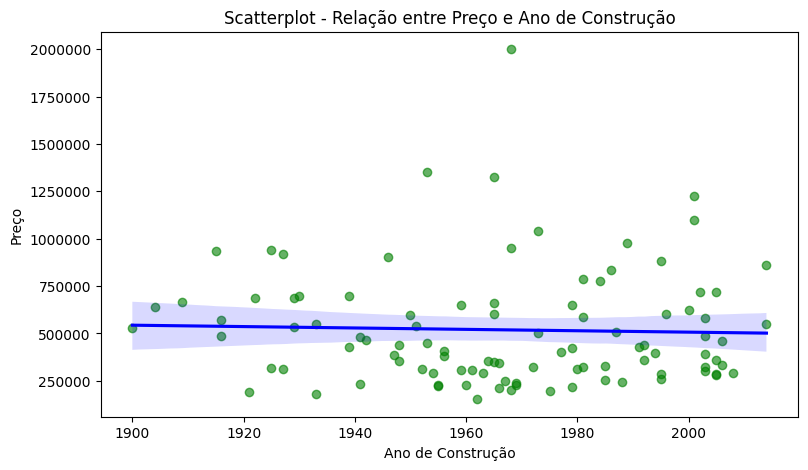

In [ ]:
# Regplot para preço vs ano de construção
  #Regplot = Scatterplot com linha de regressão, comum pois a reta de regressão ajuda a identificar padrões leneares nos dados.
plt.figure(figsize=(9, 5))
#plt.scatter(df['yr_built'], df['price'], color='green', label='Preço', alpha=0.5)
sns.regplot(x='yr_built', y='price', data=df, scatter_kws={'color': 'green', 'alpha': 0.6}, line_kws={'color': 'blue'})  #scatter + linha de regressão
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot - Relação entre Preço e Ano de Construção")
plt.xlabel("Ano de Construção")
plt.ylabel("Preço")
plt.show()

Considerando a relação entre preço e ano de construção, não é visível uma tendência de aumento de preço, ao longo do tempo.

#### Contingency table (cat x cat)

Tabela de contingência: avalia a correlação entre variáveis categóricas
- Qual a correlação entre o número de quartos e a nota?

In [ ]:
#Tabela de contingência
pd.crosstab( df['bedrooms'], df['grade'] )

grade,5,6,7,8,9,10,11
bedrooms,,,,,,,
2,0,1,8,0,0,0,0
3,0,4,26,17,5,0,0
4,1,0,14,6,4,3,1
5,0,0,2,5,1,1,1


In [ ]:
# Tabela de contingência %
cont_table_norm = pd.crosstab( df['bedrooms'], df['grade'],normalize=True)
cont_table_norm
#normalize='columns' = across cols,
            #'index' = across rows,
            # True   = across entire df.

grade,5,6,7,8,9,10,11
bedrooms,,,,,,,
2,0.00,0.01,0.08,0.00,0.00,0.00,0.00
3,0.00,0.04,0.26,0.17,0.05,0.00,0.00
4,0.01,0.00,0.14,0.06,0.04,0.03,0.01
5,0.00,0.00,0.02,0.05,0.01,0.01,0.01


Plotar no formato de Heatmap, para melhor compreensão:

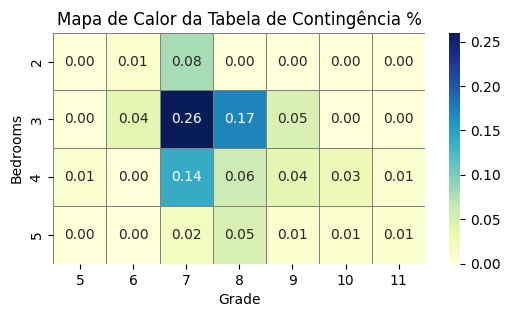

In [ ]:
# Criando o mapa de calor
plt.figure(figsize=(6, 3))
sns.heatmap(cont_table_norm, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Mapa de Calor da Tabela de Contingência %')
plt.xlabel('Grade')
plt.ylabel('Bedrooms')
plt.show()

#### Bar (cat x num)

Gráfico de barras: comparar média, soma ou contagem de var num em uma categórica.

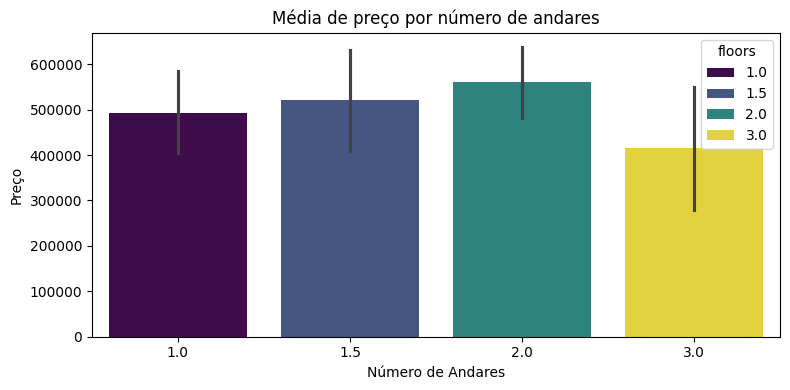

In [ ]:
#Média de preço por número de andares:
plt.figure(figsize=(8, 4));
sns.barplot(x='floors', y='price', data=df, estimator='mean', palette='viridis', hue='floors')
plt.title('Média de preço por número de andares')
plt.xlabel('Número de Andares')
plt.ylabel('Preço')
plt.tight_layout()
plt.show();

#### Boxplot (cat x num)

Boxplot: ver distribuição de var categócica vs numérica
  - Robusto contra outliers
  - Ex: Preço de casas por quantidade de pisos



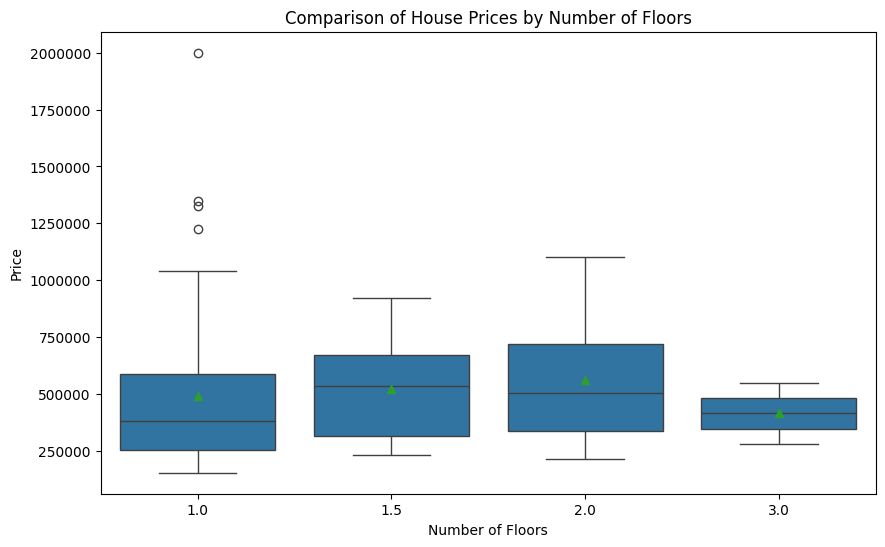

In [ ]:
#Comparar casas por número de pisos:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='price', data=df, showmeans=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison of House Prices by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()
#Com plotly express, pra ver os pontos:
#import plotly.express              as px
#fig = px.box(df, x='floors', y='price', points='all', title='Comparison of House Prices by Number of Floors')
#fig.show()

Interpretação:
- Área em azul: IQR (Q1 a Q3): parte central dos dados.
- Linha central: mediana (Q2).
 - Simetria: Se mediana + próx de Q1, skew positiva: concentração dos valores é baixa. Se de Q3, é alta.
- Triângulo verde: média.
- T-Shaped Whiskers:
 - Se longos, indica grande variação nos dados.
 - Se estendem até (IQR X 1.5): o menor e o maior valor que não são considerados outliers.
 - Pontos fora são outliers: 'o'.


In [ ]:
#Outliers: Valores abaixo de Q1 - (1.5 x IQR) ou acima de Q3 + (1.5 x IQR). Cálculo no braço deles:
Q1_ = 308000.00
Q3_ = 653125.00
IQR_ = 308000.0

print(f'Outliers: preços abaixo de: {Q1_ - (1.5 * IQR_)} ou acima de: {Q3_ + (1.5 * IQR_) }')

Outliers: preços abaixo de: -154000.0 ou acima de: 1115125.0


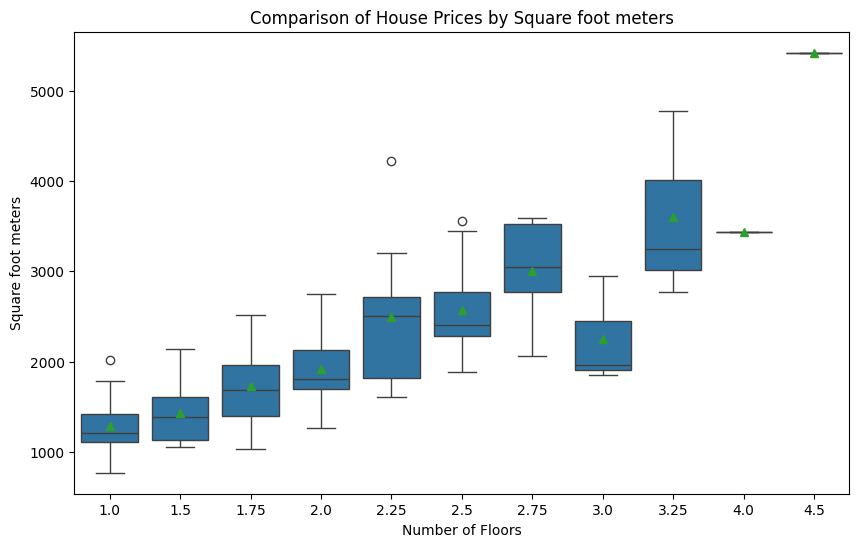

In [ ]:
#Outro exemplo: Número de banheiros por metro quadrado construído:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='sqft_living', data=df, showmeans=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison of House Prices by Square foot meters')
plt.xlabel('Number of Floors')
plt.ylabel('Square foot meters')
plt.show()

Em geral, o número de banheiros aumenta, conforme a metragem construída aumenta.

#### Violin (cat x num)

Gráfico de Violino: é o boxplot com estimativas de densidade no eixo y
- Vantagem: dá melhor ideia da concentração dos dados ao longo de y.
- Desvangagem: não mostra outliers com clareza.

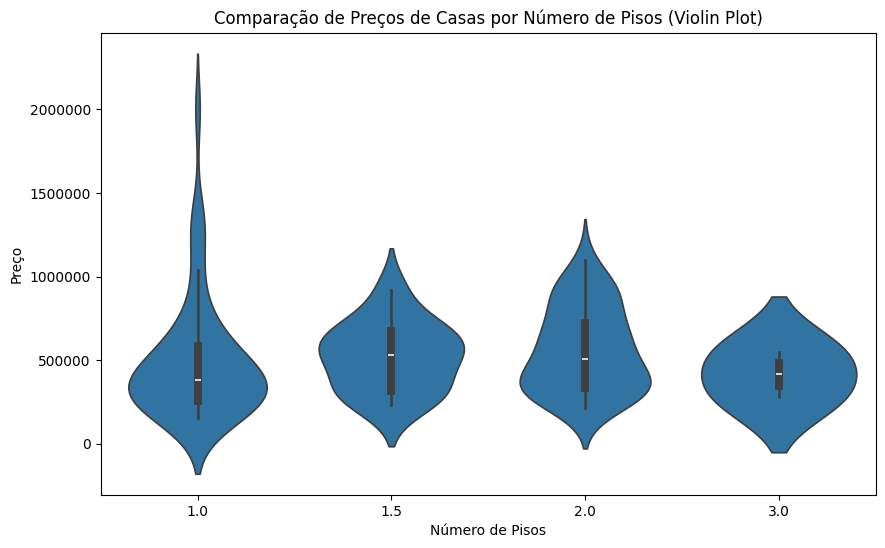

In [ ]:
# Crie a figura
plt.figure(figsize=(10, 6))
sns.violinplot(x='floors', y='price', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparação de Preços de Casas por Número de Pisos (Violin Plot)')
plt.xlabel('Número de Pisos')
plt.ylabel('Preço')
plt.show()

Aqui, quanto mais largo o corpo do violino, mais amostras estão concentradas naquele ponto no eixo y.

#### Hexbin (cat x num)

Gráfico de Colmeia: similar ao scatter (relação entre 2 vars), mas ao invés de mostrar os pontos, agrupa em hexágonos, com cor indicando o número de registros naquela área.

In [ ]:
#carregar 5k pontos agora:
df2 = pd.read_csv(url, low_memory=False, nrows=5000).drop('id', axis=1)
#remover acima de 1.1m (outliers), para poder visualizar melhor:
df2 = df2.loc[df2.price < 1100000 ]
df2.shape

(4726, 20)

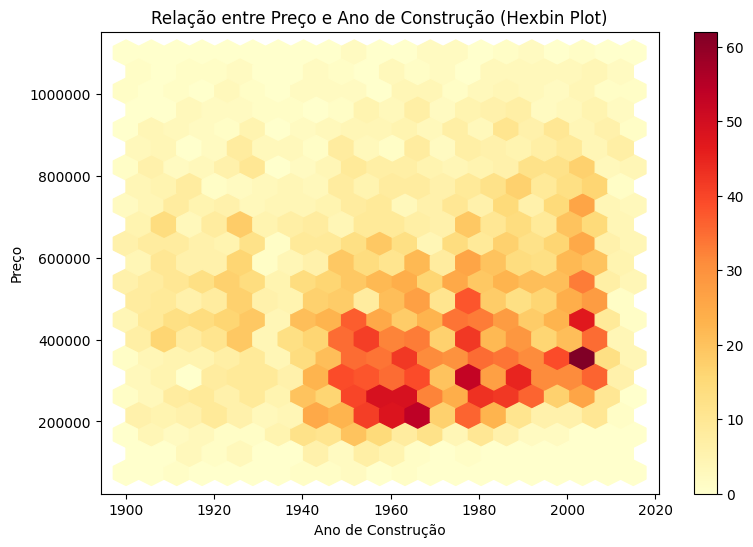

In [ ]:
# Hexbin plot
plt.figure(figsize=(9, 6))
plt.hexbin(x=df2['yr_built'], y=df2['price'], gridsize=20, cmap='YlOrRd')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Relação entre Preço e Ano de Construção (Hexbin Plot)")
plt.xlabel("Ano de Construção")
plt.ylabel("Preço")
plt.colorbar();

Acima é possível ver uma fraca correlação entre preço e ano, dado que na direita do gráfico, há um pouco mais de concentração (cores escuras) na parte superior do gráfico, indicando maiores preços.

#### KDE (cat x num)

Gráfico de densidade (KDE - kernel density estimate): mapa topográfico das variáveis, onde níveis mais altos indica maior concentração.

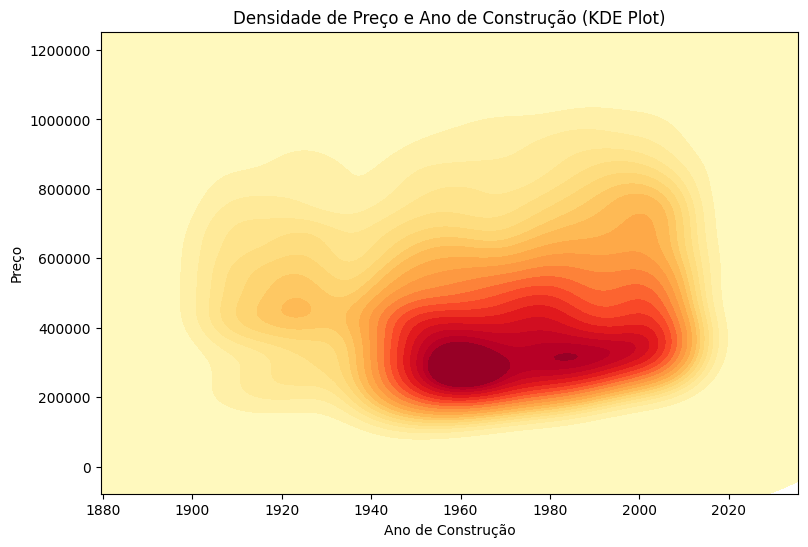

In [ ]:
# KDE plot
plt.figure(figsize=(9, 6))
sns.kdeplot(x=df2['yr_built'], y=df2['price'], cmap='YlOrRd', fill=True, thresh=0, levels=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Densidade de Preço e Ano de Construção (KDE Plot)")
plt.xlabel("Ano de Construção")
plt.ylabel("Preço")
plt.show()

É possível ver que a maioria das amostras está concentrada em casas dos anos 60, e a maioria dos preços entre 200 a 400k.

## 2 Estatística Inferencial


Estatística inferencial: fazer generalizações e tirar conclusões sobre uma população a partir de uma amostra representativa.
- 'n'=amostra  |  'N'=população.
- μ (letra grega "mi")=média da população  |  x̄ (x barra)=média da amostra

Qualidade é mais importante que a quantidade, logo o DS se concentra nas amostras:
- Missings e outliers podem conter infos úteis, mas é inviável inspecionar a fundo se houver excesso.
- O cenário clássico onde big data gera valor, é quando os dados não são só grandes, mas também esparsos:
 - Ex: pesquisas do google como 1 linha de banco, palavra inglesa (150k+ em Inglês) como coluna (0 ou 1). A enorme parte das cols será zero. Resulta em matriz esparsa. Aqui, não usa amostra.
 - Por isso eu faço os estudos no banco com amostragem, não carece de big data.
- Mesmo em projetos de big data, modelos preditivos são geralmente desenv. com amostras.
 - Ex real, onde usar um subsample menor vs o um downsample com 5Mi rows, aumentou o AUC só na terceira casa decimal: ([Kaggle s4e7 - You don't need all the samples](https://www.kaggle.com/competitions/playground-series-s4e7/discussion/517167)

Técnicas de seleção de amostras:
- Amostragem Aleatória: amostra aleatoriamente obtida da população.
- Amostragem Estratificada: divide a população em estratos (subgrupos), e faz amostragens aleatórias em cada estrtato.
 - Usada quando precisa garantir que todos os estratos sejam representados.
  - Ex: train_test_split p/ classificação. Ou p/ saber intenções de voto de subgrupos, como evangélicos.

Amostragem com reposição: observações são devolvidas à população após cada extração. Se sem reposição, não são devolvidas.



**Vieses:**

Viés de amostragem: amostra não representa a população.
 - Ex: Notas de restaurantes no Google, Tripadvisor.. tendem ao víes, não indicando a situação real, pois quem avalia não é aleatoriamente selecionado.

Viés de seleção: escolher dados de forma seletiva, com ou sem intenção.
- Ex: No caso de avaliações de clientes, ocorre de alguns estabelecimentos pedirem ativamente uma avaliação só pra quem elogiou/foi bem atendido.
- Ex: Se uma pesquisa de intenção de voto só acontece em determinados bairros, ou horários, pode fazer com que certos grupos tenham maior probabilidade de ser incluídos na amostra que outros.

### Variabilidade Amostral

Variabilidade Amostral:
Refere-se à variação nas estimativas de uma estatística (como a média) quando diferentes amostras são retiradas da mesma população.
- Ex: "Se retirarmos várias amostras de uma população e calcularmos a média de cada uma, veremos que as médias variam. Essa variação é a variabilidade amostral."
 - Entender a variabilidade amostral é crucial para a inferência estatística, pois ajuda o DS a avaliar a precisão e a confiabilidade das estimativas obtidas a partir de amostras.
- Será estimado com bootstrap, na prática, através do Erro Padrão.

Teorema de limite central (TLC):
- TLC: A distribuição das médias amostrais tende a se aproximar de uma normal, conforme o tamanho das amostras cresce, mesmo que a distr. original da população não seja normal. Essa aproximação se torna bastante precisa quando 𝑛 ≥ 30.
- Como converge numa normal, possibilita a aplicação de testes de hipótese e construção de intervalos de confiança (papel em geral pequeno na ciência de dados), permitindo fazer inferências sobre a população. Serão obtidos através do boostrap abaixo.

### Bootstrap

Bootstrap: método de amostragem com repetição, que permite estimar a distribuição (variabilidade) de uma estatística (como a média) a partir de uma amostra.
- Não requer distribuição normal dos dados, logo é muito útil.
- Ele não compensa pequenos tamanhos de amostra, nem preenche buracos em um dataset existente. Meramente informa sobre como diversas amostras adicionais se comportariam ao serem extraídas de uma população.
- Permite estimar a distribuição de uma variedade de estatísticas, como medianas, variâncias, quantis, e até mesmo estatísticas mais complexas (ex: NPS).
- A Random Forest usa bagging, que é a abreviação de bootstrap aggregating, para aumentar seu poder preditivo: ao setar 100 árvores, cada uma é treinada sobre 1 amostra bootstrap, é podada rasa, e é tirada uma média das previsões das árvores pra regressão, e votação pra classif. Ver bootstrap multivariado, onde linhas (contendo vários valores de features) são amostradas como unidades.
- Faz amostragem com repetição. Não misturar com "reamostragem", onde em permutação combina amostras, e pode ser feita sem reposição (detalhes mais adinate).

Útil para calcular:
- Erro padrão (EP):
 - Métrica única que resume a variabilidade de uma estatística amostral.
 - Indica por ex quão bem a média de uma amostra representa a média da população. Um erro-parão menor indica que a média amostral é uma estimativa mais precisa da média populacional.
 - É na prática o desvio padrão das médias extraídas via bootstrap.
 - Difere do STD, que mede variabilidade de pontos do dados individuais, e não de uma estatística.

- Intervalos de Confiança:
 - Serve para entender o potencial erro de uma estimativa de amostra, e avaliar se uma amostra maior é necessária.
 - Ex: temos 95% de confiança de que a verdadeira média da população está entre [47.2 e 50.6].
 - Estes 95% são o nível de confiança. Quanto maior o nível, maior o intervalo.
 - O intervalo nesse exemplo, abrange os 95% pontos centrais da distribuição da média.

- Testes de Hipóteses:
 - Ex: testar se com um nível de confiança de 95% (por ex), "A média da população é diferente de 50". Detalhado mais abaixo.



In [ ]:
#implementar o bootstrap em Python para estimar: erro padrão, intervalo de confiança, realizar um teste de hipótese:
##########################################################################################################################

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
# Quanto mais interações, e menor o scale (std), mais precisa será a estimativa do erro-padrão, ou do intervalo de confiança.

print(f'Gerada uma amostra aleatória (seed fixo) de 100 dados normalmente distribuídos, com média 50 e desvio padrão 10')
print(f'Exemplo de alguns dos 100 pontos gerados: {data[:5]}')

Gerada uma amostra aleatória (seed fixo) de 100 dados normalmente distribuídos, com média 50 e desvio padrão 10
Exemplo de alguns dos 100 pontos gerados: [54.96714153 48.61735699 56.47688538 65.23029856 47.65846625]


In [ ]:
# Função para realizar o bootstrap: gera várias amostras (num_samples) com reposição e calcula a média de cada amostra.
def bootstrap(data, num_samples=100):
    n = len(data)
    samples = np.random.choice(data, (num_samples, n), replace=True)
    means = np.mean(samples, axis=1)
    return means

# Realizando o bootstrap
bootstrap_means = bootstrap(data)
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos!) com reposição. \nFoi calculada então a média de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 100 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos!) com reposição. 
Foi calculada então a média de cada grupo de 100 pontos. Exemplos: [49.07838716 50.4478751  49.12691128 48.59665839 48.52760311]


#### Erro Padrão

In [ ]:
# Calculando o erro padrão como o desvio padrão das médias bootstrap
standard_error = np.std(bootstrap_means)

print(f"Erro padrão das médias: {round(standard_error, 2)}.")
print(f"Média da amostra: {round(np.mean(data),2)}.")
print(f"Um erro padrão de {round(standard_error, 2)} significa que, em média, as médias das amostras bootstrap variam em torno de {round(standard_error, 2)} unidades da média de {round(np.mean(data),2)}.")
print(f"Logo, as médias das amostras bootstrap estão em uma faixa entre. {round(np.mean(data) - standard_error,2)} e {round(np.mean(data) + standard_error,2) }.")


Erro padrão das médias: 0.95.
Média da amostra: 48.96.
Um erro padrão de 0.95 significa que, em média, as médias das amostras bootstrap variam em torno de 0.95 unidades da média de 48.96.
Logo, as médias das amostras bootstrap estão em uma faixa entre. 48.01 e 49.91.


#### Intervalo de confiança

Média da amostra: 48.96 (linha em vermelho).
Margem de erro: ± 1.64.
Intervalo de confiança: temos 95% de confiança de que a verdadeira média da população está entre [47.25 50.54] (linhas em verde).
- Se repetíssemos o processo de amostragem muitas vezes, aproximadamente 95% dos intervalos calculados conterão a verdadeira média da população.


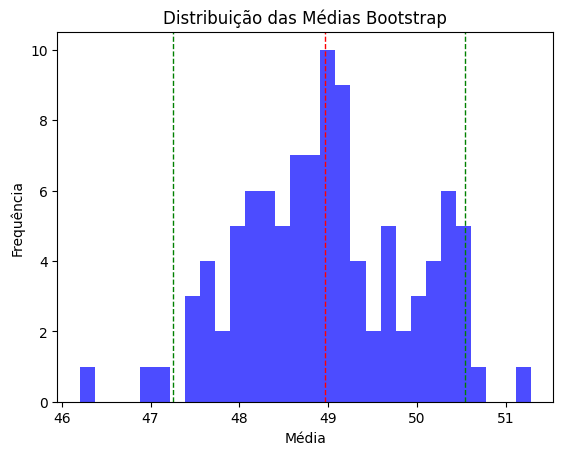

In [ ]:
# Calculando o intervalo de confiança pode ser feito com base no:
  #1. Percentis: É preferível não assume que a distribuição das médias bootstrap seja normal.
    #Logo, Mesmo com tamanhos de amostra relativamente pequenos (e distribuição possivelmente mais assimétria), ainda pode fornecer intervalos de confiança válidos. Também é mais robusto contra outliers.
  #2. Erro padrão: Abordagem mais tradicional, mas assume que a distr. das médias do bootstrap seja normal. Dado o já citado acima, manter o cálculo dos intervalos por meio dos percentis.

conf_interval = np.percentile(bootstrap_means, [2.5, 97.5]) #Esses valores representam os percentis que definem o intervalo de confiança de 95%.
# Arredondando o intervalo de confiança para 2 casas decimais
conf_interval = np.round(conf_interval, 2)

# Calculando a margem de erro: é a diferença entre a média amostral e os limites do intervalo de confiança.
margin_of_error = (conf_interval[1] - conf_interval[0]) / 2
  #é calculada como a metade da largura do intervalo de confiança

# Resultados
print(f"Média da amostra: {round(np.mean(data),2)} (linha em vermelho).")
print(f"Margem de erro: ± {round(margin_of_error, 2)}.")
print(f"Intervalo de confiança: temos 95% de confiança de que a verdadeira média da população está entre {conf_interval} (linhas em verde).")
print(f"- Se repetíssemos o processo de amostragem muitas vezes, aproximadamente 95% dos intervalos calculados conterão a verdadeira média da população.")

# Visualizando a distribuição das médias bootstrap: Um histograma das médias bootstrap é plotado, com linhas verticais indicando a média da amostra original e os limites do intervalo de confiança.
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[0], color='green', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='green', linestyle='dashed', linewidth=1)
plt.title('Distribuição das Médias Bootstrap')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.show()

Isto é útil, por exemplo, para dizer que temos 95% de confiança de que a verdadeira nota NPS do grupo A está entre 60 e 62, e do grupo B de 65 a 67. Logo, afirmamos que B tem NPS maior que A, pois está fora da margem de erro.

Ao usar 10k pontos na amostra, e 10k iterações no bootstrap, reduzimos a variação do intervalo de confiança, e logo a margem de erro, obtendo uma média da amostra mais próxima da média real da população:
- Média da amostra: 49.97 (linha em vermelho).
- Margem de erro: ± 0.2.
- Intervalo de confiança: temos 95% de confiança de que a verdadeira média da população está entre [49.78 50.18] (linhas em verde).


#### Teste de Hipótese

- Hipótese Nula (H₀): A afirmação inicial que se presume verdadeira até que evidências contrárias sejam apresentadas. Geralmente, representa a ideia de "nenhum efeito" ou "nenhuma diferença".
 - Ex: Testar se a média de uma população é diferente de 50.

- Hipótese Alternativa (H₁ ou Ha): A afirmação que será aceita se as evidências contrárias à hipótese nula forem suficientemente fortes. Representa a ideia de "algum efeito" ou "alguma diferença".

No cenário abaixo:
- H₀ (nula): A média da população é 50.
- H₁ (alternativa): A média da população não é 50.
- Nível de significância (α) = 0,05 (nível de confiança de 95%)
 - Um α = 0,05 significa que você está disposto a aceitar uma probabilidade de 5% de cometer um erro do tipo I: rejeitar a hipótese nula (H₀) quando ela é verdadeira.

In [ ]:
#aproveita o código já gerado acima do bootstrap:
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. \nFoi calculada então a média de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 1000 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. 
Foi calculada então a média de cada grupo de 100 pontos. Exemplos: [48.88660717 48.72053516 48.42534363 48.79683588 47.69467533]


In [ ]:
# Definindo a média sob a hipótese nula
hypothesized_mean = 50  # Hipótese nula
# Calculando a média da nova amostra
observed_mean = np.mean(data)

# Ajustando a distribuição bootstrap para simular a hipótese nula
bootstrap_means_null = bootstrap_means - np.mean(bootstrap_means) + hypothesized_mean
# Calculando o valor-p corretamente: Vamos calcular a proporção de amostras bootstrap sob a hipótese nula cuja média é mais extrema do que a média observada
p_value = np.mean(bootstrap_means_null >= observed_mean)


# Resultados
print(f"Média da amostra: {observed_mean}")
print(f"Valor-p: {p_value}")

# Interpretação do valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a média da população é significativamente diferente de 50.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média da população é diferente de 50.")

Média da amostra: 48.96153482605907
Valor-p: 0.877
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média da população é diferente de 50.


Alterando agora a média dos 100 dados gerados 53, mantendo o std 100:

In [ ]:
np.random.seed(42)
new_data = np.random.normal(loc=53, scale=10, size=100)  # Média elevada para forçar a rejeição da H0
print(f'Gerada uma amostra aleatória de 100 dados normalmente distribuídos, com média 53 e desvio padrão 10')
print(f'Exemplo de alguns dos 100 pontos gerados: {new_data[:5]}')

Gerada uma amostra aleatória de 100 dados normalmente distribuídos, com média 53 e desvio padrão 10
Exemplo de alguns dos 100 pontos gerados: [57.96714153 51.61735699 59.47688538 68.23029856 50.65846625]


In [ ]:
# Realizando o bootstrap novamente, com os novos dados:
bootstrap_means = bootstrap(new_data)
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. \nFoi calculada então a média de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 1000 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposição. 
Foi calculada então a média de cada grupo de 100 pontos. Exemplos: [51.88660717 51.72053516 51.42534363 51.79683588 50.69467533]


É possível ver agora que as amostras do bootstrap geram médias um pouco mais altas que as anteriores, dado que a média agora é 53.

In [ ]:
# Definindo a média sob a hipótese nula
hypothesized_mean = 50  # Hipótese nula
# Calculando a média da nova amostra:
observed_mean = np.mean(new_data)

# Ajustando a distribuição bootstrap para simular a hipótese nula
bootstrap_means_null = bootstrap_means - np.mean(bootstrap_means) + hypothesized_mean
# Calculando o valor-p corretamente: Vamos calcular a proporção de amostras bootstrap sob a hipótese nula cuja média é mais extrema do que a média observada
p_value = np.mean(bootstrap_means_null >= observed_mean)

# Resultados
print(f"Média da amostra: {observed_mean}")
print(f"Valor-p: {p_value}")

# Interpretação do valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: a média da população é significativamente diferente de 50.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que a média da população é diferente de 50.")

Média da amostra: 51.96153482605907
Valor-p: 0.012
Rejeitamos a hipótese nula: a média da população é significativamente diferente de 50.


Agora, é possível afirmar nível de confiança de 95% que: a média da população é significativamente diferente de 50.

Poderia também utilizar o teste t, ao invés do bootstrap aqui, mas ele tem a normalidade como premissa, o que dificulta.

### Distribuições

Os dados costumam ser consistentes com mais de um tipo de distribuição. Existem tipos de distribuição melhores para modelar dadas situações.



#### Normal

- A distribuição gaussiana é simétrica em torno da média.
- Raramente as features são normalmente distribuídas. A utilidade da distr. normal vem do fato de que seg. o TCL, a distribuição das médias amostrais tende a uma normal, conforme o tamanho das amostras cresce.
 - Mesmo assim, seu uso só vem em último recurso, quando distribuições bootstrap não estão disponíveis, como no caso de uma população muito pequena (menor que 30 a 50 pontos).

 Regressão à média:
- Observações extremas tendem a ser seguidas pelas mais centrais.

##### Normal Padrão

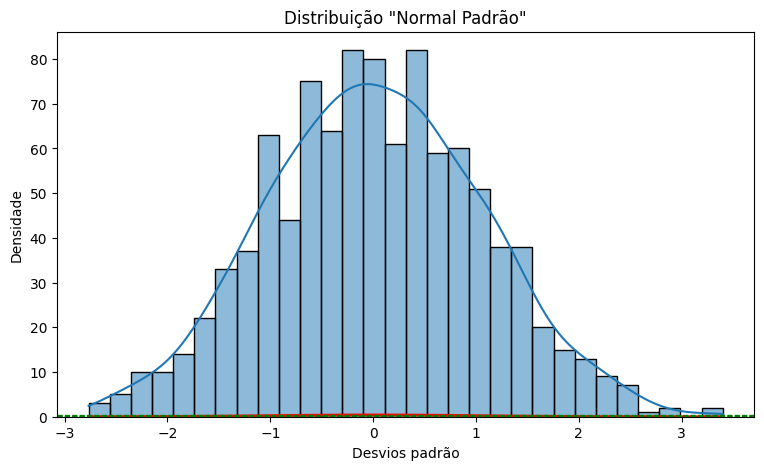

In [ ]:
# Definindo os parâmetros da distribuição normal
mean = 0
std_dev = 1

# Gerando dados sintéticos
np.random.seed(98)
data_norm = np.random.normal(loc=mean, scale=std_dev, size=1000)

# Criando o gráfico
plt.figure(figsize=(9, 5))
sns.histplot(data_norm, kde=True, bins=30)

# Plotando a curva normal
x = np.linspace(data_norm.min(), data_norm.max(), 100)
pdf = (np.exp(-(x - mean)**2 / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, color='red', linewidth=2)

# Adicionando linhas no eixo y para 1, 2 e 3 desvios padrões
plt.axhline(y=0.3989, color='green', linestyle='--', linewidth=1)  # 1 desvio padrão
plt.axhline(y=0.1989, color='green', linestyle='--', linewidth=1)  # 2 desvios padrões
plt.axhline(y=0.0668, color='green', linestyle='--', linewidth=1)  # 3 desvios padrões

# Configurando o título e rótulos dos eixos
plt.title('Distribuição "Normal Padrão"')
plt.xlabel('Desvios padrão')
plt.ylabel('Densidade')

# Exibindo o gráfico
plt.show()

A distribuição "Normal Padrão" é aquela na qual as unidades no eixo x, são expressas em desvios-padrão da média.
- 68% dos dados estão dentro de 1 std da média.
- 95% dentro de 2.
- 99,7 dentro de 3.

##### Gráfico QQ (Quantile-Quantile)

Serve para mostrar visualmente o quão próxima uma amostra está de uma distribuição normal.
 - Eixo X: quantis da distribuição teórica (comparado com uma normal). Eixo y: quantis de dados amostrais.
  - Os quantis variam de 0 a 1, mas quando estamos lidando com dados reais, os valores dos quantis podem ser representados em qualquer escala que os dados utilizem.
 - Se os pontos da feature se alinharem próximas da linha diagonal, isso sugere que os dados seguem uma distribuição normal.
 - Se houver desvios significativos, isso indica que os dados não são normalmente distribuídos.
  - Se houver um formato em S ao redor da linha, indica a presenta de cauda.
  - Se os pontos estiverem agrupados numa área específica do gráfico, sugere a presença de outliers ou que a distribuição dos dados é assimétrica.

In [ ]:
data_norm[:5]

array([ 0.47371708,  1.63760344,  0.99854198, -0.70740687, -1.0422073 ])

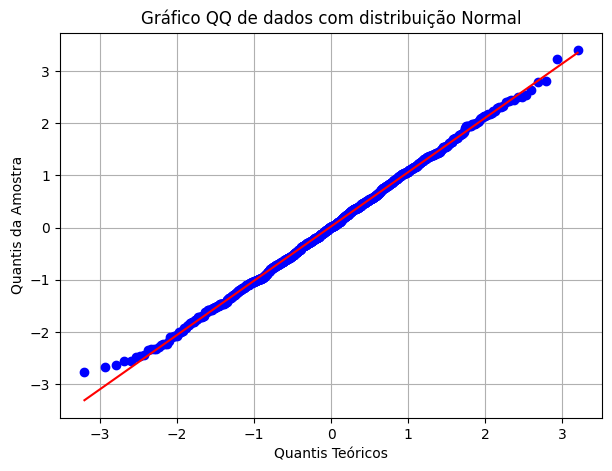

In [ ]:
# Criando o gráfico QQ, dos dados sintéticos criados mais acima:
plt.figure(figsize=(7, 5))
stats.probplot(data_norm, dist="norm", plot=plt)

# Configurando o título e rótulos dos eixos
plt.title('Gráfico QQ de dados com distribuição Normal')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')

# Exibindo o gráfico
plt.grid()
plt.show()

Como os pontos acompanham a linha, confirmamos que trata-se de uma distribuição normal.

#### Cauda Longa

Distr cauda longa: a cauda de um dos lados é mais longa.

Plotar histograma com curva de densidade, para avaliar a curva:

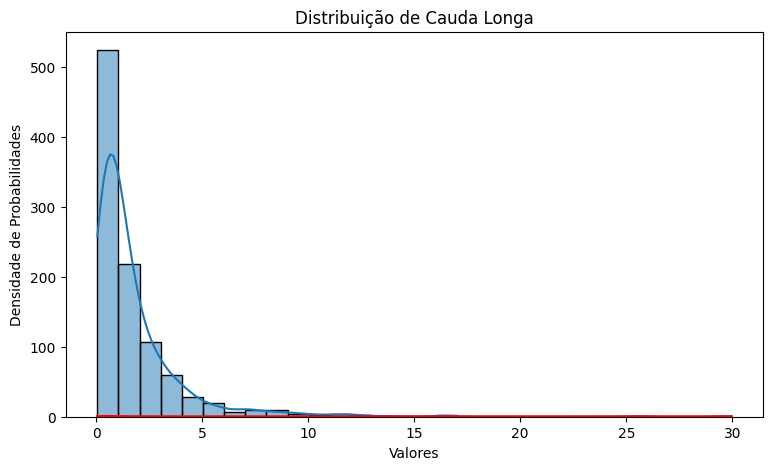

In [ ]:
# Definindo os parâmetros da distribuição log-normal
mean = 0
std_dev = 1

# Gerando dados sintéticos com distribuição log-normal
np.random.seed(98)
data_caulong = np.random.lognormal(mean=mean, sigma=std_dev, size=1000)

# Criando o gráfico
plt.figure(figsize=(9, 5))
sns.histplot(data_caulong, kde=True, bins=30)

# Plotando a curva da distribuição log-normal
x = np.linspace(data_caulong.min(), data_caulong.max(), 100)
pdf = (np.exp(-(np.log(x) - mean)**2 / (2 * std_dev**2)) / (x * std_dev * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, color='red', linewidth=2)

# Configurando o título e rótulos dos eixos
plt.title('Distribuição de Cauda Longa')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidades')

# Exibindo o gráfico
plt.show()

Os pontos caem de forma decrescente ao longo do gráfico, gerando uma cauda longa visível.

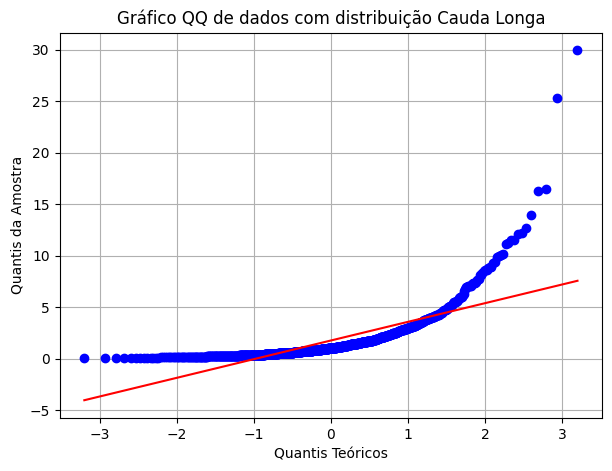

In [ ]:
# Criando o gráfico QQ, dos dados sintéticos criados mais acima:
plt.figure(figsize=(7, 5))
stats.probplot(data_caulong, dist="norm", plot=plt)

# Configurando o título e rótulos dos eixos
plt.title('Gráfico QQ de dados com distribuição Cauda Longa')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')

# Exibindo o gráfico
plt.grid()
plt.show()

O formato em S ao redor da linha, indica a presenta de cauda.

#### t de Student

É uma distribuição normal, mas com caudas mais longas.
- A distribuição t de Student é usada quando o tamanho da amostra é pequeno (geralmente 𝑛<30) e/ou quando a variabilidade da população é desconhecida.
- Ressaltando que, para amostras maires, a distribuição das médias amostrais se aproxima de uma distribuição normal (TCL).







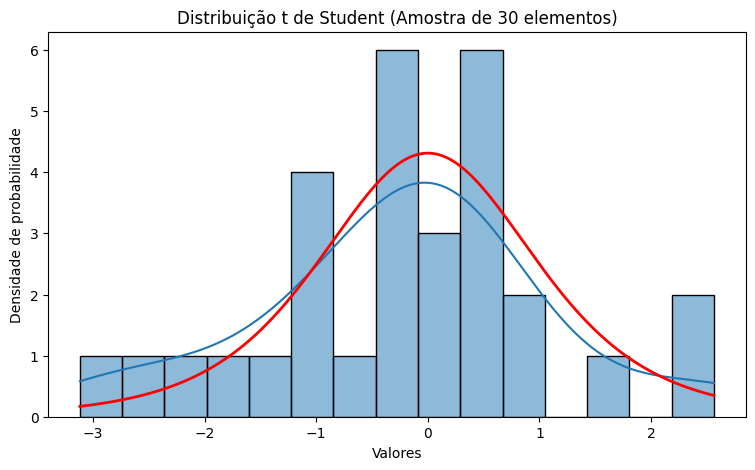

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Definindo os parâmetros da distribuição t de Student
grausl = 5  # graus de liberdade

# Gerando dados sintéticos com distribuição t de Student para uma amostra de 30 elementos
np.random.seed(98)
data_student = np.random.standard_t(grausl, size=30)

#Setando o número de bins
bins = 15

# Criando o gráfico
plt.figure(figsize=(9, 5))
sns.histplot(data_student, bins=bins, stat="count", kde=True)

# Plotando a curva da distribuição t de Student (red)
x = np.linspace(data_student.min(), data_student.max(), 1000)
pdf = stats.t.pdf(x, grausl)  # Função de densidade de probabilidade da distribuição t
plt.plot(x, pdf * len(data_student) * (data_student.max() - data_student.min()) / bins, color='red', linewidth=2)  # Ajustando a curva para contagem

# Configurando o título e rótulos dos eixos
plt.title('Distribuição t de Student (Amostra de 30 elementos)')
plt.xlabel('Valores')
plt.ylabel('Densidade de probabilidade')

# Exibindo o gráfico
plt.show()

Em vermelho, temos a  curva da distribuição t de Student.

Esse gráfico é útil para visualizar como os dados se distribuem em uma amostra pequena, refletindo a incerteza e a variabilidade associadas a amostras menores.

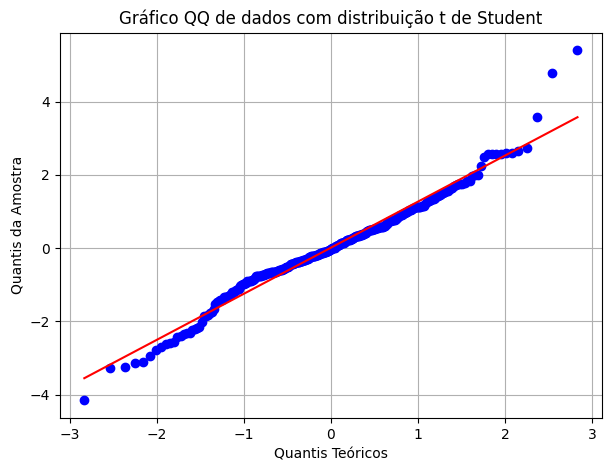

In [ ]:
# Criando o gráfico QQ, dos dados sintéticos criados mais acima:
plt.figure(figsize=(7, 5))
stats.probplot(data_tsudent, dist="norm", plot=plt)

# Configurando o título e rótulos dos eixos
plt.title('Gráfico QQ de dados com distribuição t de Student')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')

# Exibindo o gráfico
plt.grid()
plt.show()

#### Binomial

Binomial: ter dois resultados possíveis. Ex: 0/1, sim/não, comprar/não comprar.
- É a distribuição do númedo de sucessos em x ensaios.
- Resultados binomiais são importantes para modelar, já que representam decisões fundamentais, como clicar/não clicar.
- Em estatística, é comum chamar 1 de "sucesso", atribuíndo ele ao resultado mais raro.
 - "Sucesso" não indica que o resultado seja benéfico, mas sim que é o resultado de interesse.
 - Ex: A uma transação fraudulenta como variável dependente seria atribuído 1 (mais rara, é de interesse prever), e a uma transação não fraudulenta, 0.
 - Responde questões como: Se a probabilidade de um clique se converter em venda é 0,02, qual a probabilidade de se observar 0 vendas em 200 cliques?

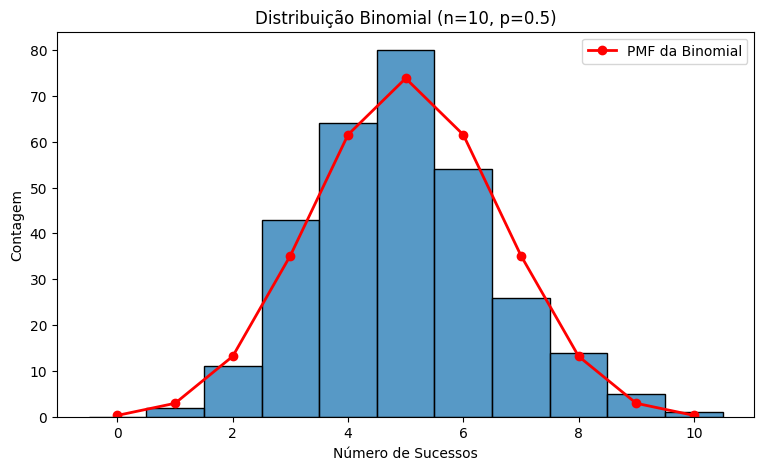

In [ ]:
# Definindo os parâmetros da distribuição binomial
n = 10  # número de ensaios
p = 0.5  # probabilidade de sucesso

# Gerando dados sintéticos com distribuição binomial
np.random.seed(98)
data_binomial = np.random.binomial(n, p, size=300)

# Criando o gráfico
plt.figure(figsize=(9, 5))
sns.histplot(data_binomial, bins=np.arange(-0.5, n + 1.5, 1), stat="count", kde=False)

# Plotando a curva da distribuição binomial
x = np.arange(0, n + 1)
pmf = stats.binom.pmf(x, n, p)  # Função de massa de probabilidade da distribuição binomial
plt.plot(x, pmf * len(data_binomial), color='red', linewidth=2, marker='o', label='PMF da Binomial')  # Ajustando a curva para contagem

# Configurando o título e rótulos dos eixos
plt.title('Distribuição Binomial (n=10, p=0.5)')
plt.xlabel('Número de Sucessos')
plt.ylabel('Contagem')
plt.legend()
plt.show()

In [ ]:
data_binomial[:10]

array([6, 5, 4, 6, 5, 3, 5, 5, 4, 3])

O gráfico mostra a distribuição dos sucessos em n=10 ensaios, com uma probabilidade de sucesso de p=0.5.

PMF: função de massa de probabilidade da distribuição binomial.

--

Exemplo de questão: Se a probabilidade de um clique se converter em venda é 0,02, qual a probabilidade de se observar 0 vendas em 200 cliques?

In [ ]:
# Definindo os parâmetros
n = 200  # número de cliques
p = 0.02  # probabilidade de conversão

# Calculando a probabilidade de 0 vendas
k = 0  # número de vendas observadas
probabilidade_0_vendas = stats.binom.pmf(k, n, p)

# Exibindo o resultado
print(f"A probabilidade de observar 0 vendas em {n} cliques é: {probabilidade_0_vendas:.2f}")

A probabilidade de observar 0 vendas em 200 cliques é: 0.02


#### Poisson

Distribuição de probabilidade que modela eventos por período de tempo.
- Descreve a probabilidade de um número x de eventos ocorrer em um intervalo fixo de tempo ou espaço, desde que eventos ocorram c/ taxa média constante e independentemente do tempo desde o último evento.
- Ex: Mostrar a probabilidade de diferentes números de chamadas serem recebidas por um SAC em um minuto.
- É ideal para modelar eventos que ocorrem raramente em um determinado intervalo.
- Parâmetro λ (lambda): representa a média (ou taxa) de eventos que ocorrem em um intervalo fixo.   
 - Ex: se a média de chamadas recebidas em um SAC é de 2 por minuto, então λ = 2.
- Independência: eventos são considerados independentes: a ocorrência de um evento não afeta a probabilidade de ocorrência de outro.

Problema: Qual o número de atendentes necessário para ter 95% de certeza que chamadas que chegam ao SAC numa média de 2 por minuto, sejam atendidas em até 1 minuto?

In [ ]:
# Definindo os parâmetros
lambda_rate = 2  # média de chamadas por minuto
tempo_alvo = 1  # atender em até 1 minuto
confianca = 0.95  # 95% de confiança

# Função para encontrar o número mínimo de atendentes
def encontrar_num_atendentes(lambda_rate, tempo_alvo, confianca):
    lambda_total = lambda_rate * tempo_alvo  # λ = 2 chamadas/minuto * 1 minuto = 2 chamadas

    # Iniciar com 1 atendente
    num_atendentes = 1

    # Calcular a probabilidade acumulada até atingir a confiança desejada
    while True:
        # Probabilidade de atender todas as chamadas com o número atual de atendentes
        prob_acumulada = poisson.cdf(num_atendentes, lambda_total)

        if prob_acumulada >= confianca:
            break

        num_atendentes += 1

    return num_atendentes  # Retornar o número mínimo de atendentes

# Encontrar o número mínimo de atendentes
num_atendentes = encontrar_num_atendentes(lambda_rate, tempo_alvo, confianca)

# Exibir o resultado
print(f"Para ter 95% de certeza que as chamadas serão atendidas em até 1 minuto, com uma taxa média de 2 chamadas por minuto, são necessários {num_atendentes} atendentes.")

Para ter 95% de certeza que as chamadas serão atendidas em até 1 minuto, com uma taxa média de 2 chamadas por minuto, são necessários 5 atendentes.


Plot da poisson:

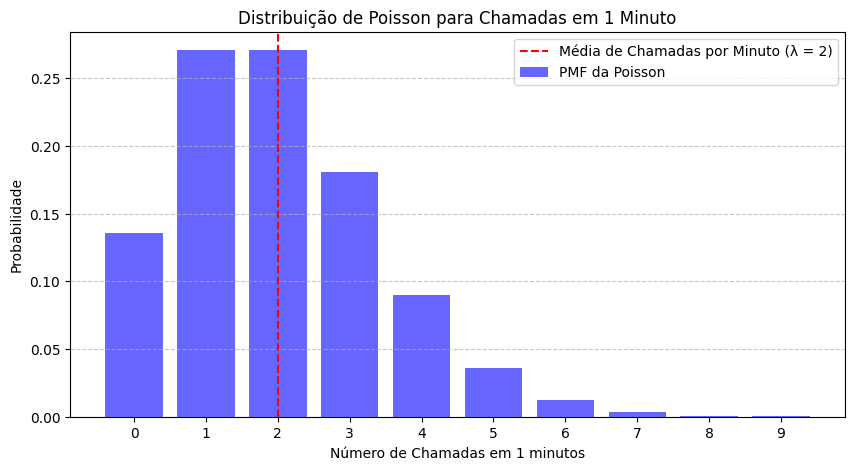

In [ ]:
#Plot

# Definindo os parâmetros
lambda_rate = 2  # média de chamadas por minuto
n_minutes = 200   # número de minutos

# Criando um array de valores de chamadas possíveis
x = np.arange(0, 10)  # Valores de 0 a 9 chamadas

# Calculando a PMF da distribuição de Poisson
pmf = poisson.pmf(x, lambda_rate)

# Criando o gráfico
plt.figure(figsize=(10, 5))
plt.bar(x, pmf, color='blue', alpha=0.6, label='PMF da Poisson')
plt.title('Distribuição de Poisson para Chamadas em 1 Minuto')
plt.xlabel('Número de Chamadas em 1 minutos')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando uma linha de referência para a média
plt.axvline(x=lambda_rate, color='red', linestyle='--', label='Média de Chamadas por Minuto (λ = 2)')

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

A maioria das chamadas se concentra em torno da média (2 chamadas), com a probabilidade diminuindo rapidamente à medida que nos afastamos desse valor.

Para ter 95% de certeza que as chamadas serão atendidas em até 1 minuto, com uma taxa média de 2 chamadas por minuto, são necessários 5 atendentes:
- Quando o número de atendentes é menor que 5, a probabilidade acumulada de atender todas as chamadas que chegam em um minuto é inferior a 95%. Com 5, garantimos que a maioria das chamadas (95%) será atendida dentro do tempo de até 1 minuto.

#### Exponencial

Usada para modelar o tempo entre eventos em um processo contínuo (Poisson).
- Ex: Um SAC recebe chamadas a uma taxa média de 3 chamadas por hora. Queremos modelar o tempo entre as chamadas usando a distribuição exponencial.

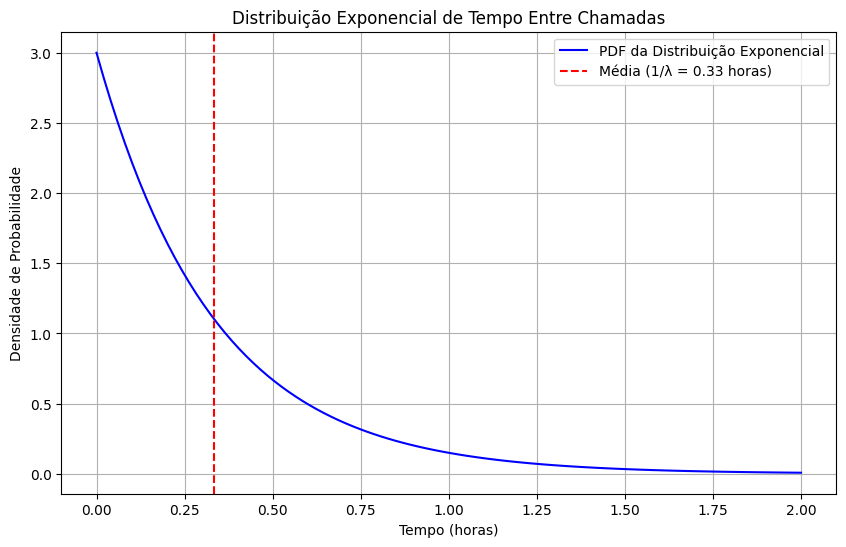

In [ ]:
# Definindo os parâmetros
lambda_rate = 3  # taxa de chamadas por hora
mean_time_between_calls = 1 / lambda_rate  # média entre chamadas

# Criando um array de valores de tempo (em horas)
x = np.linspace(0, 2, 100)  # Tempo entre 0 e 2 horas

# Calculando a PDF da distribuição exponencial
pdf = expon.pdf(x, scale=1/lambda_rate)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='PDF da Distribuição Exponencial')
plt.title('Distribuição Exponencial de Tempo Entre Chamadas')
plt.xlabel('Tempo (horas)')
plt.ylabel('Densidade de Probabilidade')
plt.axvline(mean_time_between_calls, color='red', linestyle='--', label='Média (1/λ = {:.2f} horas)'.format(mean_time_between_calls))
plt.legend()
plt.grid()
plt.show()

PDF: função de densidade de probabilidade da distribuição exponencial.

A curva azul mostra uma densidade de probabilidade que diminui rapidamente à medida que o tempo
aumenta, refletindo que é mais provável que as chamadas ocorram em intervalos de tempo curtos do que em intervalos longos.

A linha vermelha indica a média do tempo entre chamadas, que é aprox. 20 minutos

#### Weibull

Usada para análises de tempo até a falha.

- Aqui, a taxa de evento não permanece constante ao longo do tempo, como com Poisson ou Exponencial.
- Ex: estimar o risco de falha mecânica, onde o risco aumenta com o passar do tempo.

Ex: suponha que uma empresa fabrique lâmpadas incandescentes e queira garantir que elas funcionem por pelo menos 10 anos em uso normal.

Para isso, os engenheiros realizam testes acelerados, submetendo as lâmpadas a estresses elevados para simular longos períodos de uso e registrando o tempo até a falha de cada lâmpada.

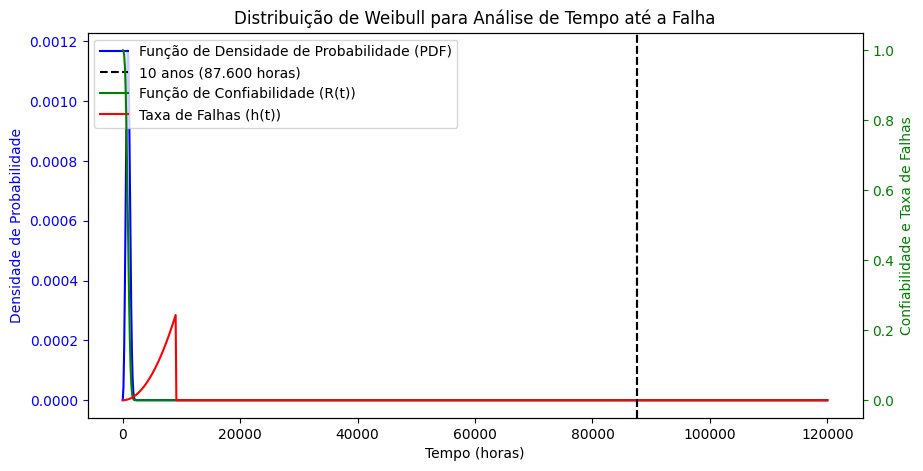

In [ ]:
# Parâmetros da distribuição de Weibull
beta = 3  # parâmetro de forma
eta = 1000  # parâmetro de escala (em horas)

# Criar um array de tempos (em horas)
tempos = np.linspace(0, 120000, 1000)  # de 0 a 120.000 horas (aproximadamente 13,7 anos)

# Calcular a função de densidade de probabilidade (PDF)
pdf = weibull_min.pdf(tempos, beta, scale=eta)

# Calcular a função de confiabilidade (R(t))
confiabilidade = weibull_min.sf(tempos, beta, scale=eta)

# Calcular a taxa de falhas (h(t))
taxa_falhas = np.zeros_like(tempos)  # Inicializar a taxa de falhas com zeros
indice_valido = confiabilidade > 0  # Índices onde a confiabilidade é maior que zero
taxa_falhas[indice_valido] = weibull_min.pdf(tempos[indice_valido], beta, scale=eta) / confiabilidade[indice_valido]

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotar a PDF
ax1.plot(tempos, pdf, color='blue', label='Função de Densidade de Probabilidade (PDF)')
ax1.set_xlabel('Tempo (horas)')
ax1.set_ylabel('Densidade de Probabilidade', color='blue')
ax1.tick_params('y', colors='blue')

# Plotar a confiabilidade no eixo y secundário
ax2 = ax1.twinx()
ax2.plot(tempos, confiabilidade, color='green', label='Função de Confiabilidade (R(t))')
ax2.plot(tempos, taxa_falhas, color='red', label='Taxa de Falhas (h(t))')
ax2.set_ylabel('Confiabilidade e Taxa de Falhas', color='green')
ax2.tick_params('y', colors='green')

# Adicionar linhas verticais para 10 anos
ax1.axvline(x=87600, color='black', linestyle='--', label='10 anos (87.600 horas)')
ax2.axvline(x=87600, color='black', linestyle='--')

# Adicionar título e legenda
ax1.set_title('Distribuição de Weibull para Análise de Tempo até a Falha')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Exibir o gráfico
plt.show()

Observe que a taxa de falhas é zero inicialmente, aumenta gradualmente e depois diminui à medida que o tempo passa.
- Isso é frequentemente associado a produtos que apresentam "falhas infantis", onde os itens falham mais frequentemente logo após a introdução no mercado devido a defeitos de fabricação ou problemas iniciais. Após esse período inicial, a taxa de falhas diminui.
- A taxa de falhas pode ser visualizada também como uma curva em forma de "banheira", onde há uma alta taxa de falhas no início (falhas infantís), uma baixa taxa de falhas durante a vida útil do produto e, finalmente, um aumento na taxa de falhas à medida que o produto se aproxima do fim de sua vida útil. Isso é comum em muitos produtos, como eletrodomésticos e veículos.